# Clean & Analyse Social Media

This project is about social media usage data analysis to help creating comprehensive report that analyses the performance of different categories of social media posts.

## Scenario

Suppose we work for a social media marketing company that specializes in promoting brands and products on a popular social media platform. Our team is responsible for analyzing the performance of different types of posts based on categories, such as health, family, food, etc. to help clients optimize their social media strategy and increase their reach and engagement.  

We want you to use Python to automatically extract tweets posted from one or more categories, and then clean, analyze and visualize the data. The team will use our analysis to  making data-driven recommendations to clients to improve their social media performance. This feature will help the marketing agency deliver tweets on time, within budget, and gain fast results.

## Objectives

The project objectives are:
1. Increase client reach and engagement
2. Gain valuable insights that will help improve social media performance
3. Achieve their social media goals and provide data-driven recommendations

## 1. Importing Required Libraries

The first step in every data, machine learning project is to import required libraries. For this project, we'll need the following libraries:
- `pandas` for data manipulation and analysis
- `Numpy` for numerical computations
- `Matplotlib` for data visualization
- `Seaborn` for statical data visialization
- `Random` for generating random numbers.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## 2. Generating Random Data For The Social Media Data

After importing required libraries, let's generate some random tweet data to analyze. To do this, We are going to use pandas `date_range` to choose a pseudo-random date within a range, the random module's `choice` to create a choice from a list, and numpys's `random` to create a random integer. But first we need to define a list of categories for the social media experiment.

In [2]:
# List of categories
categories = ['food', 'travel', 'fashion', 'fitness', 'music', 'culture', 'family', 'health']

# Generate random data
data = {
    'Date': pd.date_range('2022-01-02', periods=500),  # `periods` is the number of timesteps
    'Category': [random.choice(categories) for _ in range(500)],  # Generate a list of 500 categories from the list of categories
    'Likes': np.random.randint(0, 10000, size=500)  # Generate 5000 integer numbers between 0 and 10000
}

## 3. Loading the Data into a Pandas DataFrame and Exploring it

Now, let's load our randomly generate data into a pandas dataframe and explore it. To do so:
1. We'll use pandas `DataFrame()` method to wich we provide our data as parameter.
2. We display the dataframe head using the `pandas.DataFrame.head()` method wich returns the first n rows of the object based on position (n=5 by defautl).
3. Print the count of each `Category` element using the `value_counts()` method available for `pandas.DataFrame` objects. This method returns a Series containing the frequency of each distinct row in the Dataframe.
4. Generate descriptive statistics which includes those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Here, we'll use the `pandas.DataFrame.describe()` method which will inform as about:
    - count: The number of non-NA/null observations.
    - mean: The mean of the values.
    - min: The minimum of the values in the object.
    - 25%: The lower percentile.
    - 50%: The 50 percentile which is the same as the median.
    - 75%: The upper percentile.
    - max: The maximum of the values in the object.
    - std: The standard deviation of the observations.
5. Print a concise summary of the dataframe thanks to `pandas.DataFrame.info()`. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [3]:
# Load data into a pandas dataframe
df = pd.DataFrame(data)

# Head of the dataframe
df.head()

,Date,Category,Likes
0,2022-01-02,fashion,7997
1,2022-01-03,culture,3283
2,2022-01-04,travel,9796
3,2022-01-05,health,5713
4,2022-01-06,family,3658


In [4]:
# Shape of the dataframe
print (f"The shape of the dataframe : {df.shape}")

The shape of the dataframe : (500, 3)


In [5]:
# Count of each `Category` element
df['Category'].value_counts()

Category
fitness    77
fashion    71
health     70
culture    65
travel     57
food       56
family     53
music      51
Name: count, dtype: int64

In [6]:
# Descriptive statictics
df.describe()

,Date,Likes
count,500,500.000000
mean,2022-09-08 12:00:00,4961.804000
min,2022-01-02 00:00:00,17.000000
25%,2022-05-06 18:00:00,2521.750000
50%,2022-09-08 12:00:00,4869.000000
75%,2023-01-11 06:00:00,7436.000000
max,2023-05-16 00:00:00,9979.000000
std,NaN,2863.905598


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
# Missing values
print(f"The number of missing values (na) is each column :\n{df.isna().sum()}")

The number of missing values (na) is each column :
Date        0
Category    0
Likes       0
dtype: int64


## 4. Data Cleaning

This step is an important one, because it allows us to get ride of invalid data point thus effectively perfom statics and visualization.

In order to clean our data, we'll use pandas dataframe built-in functionality for this specific purpose. Here are the steps that we'll go through on this process:
- Remove all `Null` or `NaN` data using the dataframe `dropna` method.
- Remove duplicate values using
- Convert the `Date` field into a `datetime` format using pandas `to_datetime` method.
- Convert the `Likes` data to integer.

In [9]:
# Remove NaN values
df.dropna(inplace=True)
df.shape

(500, 3)

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(500, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [12]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert Likes to integer
df['Likes'].astype('int')  # df['Likes'] = pd.to_numeric(df['Likes'])
df.head()

,Date,Category,Likes
0,2022-01-02,fashion,7997
1,2022-01-03,culture,3283
2,2022-01-04,travel,9796
3,2022-01-05,health,5713
4,2022-01-06,family,3658


Since we generated our data, it is already clean: no nan values neither duplicates, Date and Likes data are in the intended type as well.

## 5. Data Visualization

In this section, we'll visualize our data for a better understanding. In fact, an important aspect of data analysis is the ability to physically view it to visually observe relationships among the data using  charts and graphs. The second way to analyze the data is to perform statistics on it.
- We'll compute the average First, then visualize the data using the seaborn module in a histogram plot of the Likes. This is accomplished using the method `histplot`, passing in the dataframe field ‘Likes’ as in df[‘Likes’]. In order to have the histogram show up in the output, we'll use the MathPlotLib.pyplot’s `show` method.
- Create a boxplot using seaborn's `boxplot` method with the x axis as ‘Category’, and the y axis as ‘Likes’. As before, we should always remember to call the pyplot’s `show` method to see the boxplot output.
- Perform some statistics on the data:
   - print out the mean of the ‘Likes’ catregory.
   - use the dataframe’s groupby method to print out the mean of each Category ‘Likes’
- Create a pie plot of the ‘Likes’ per ‘Category’ using MathPlotLib.pyplot's `pie` method.

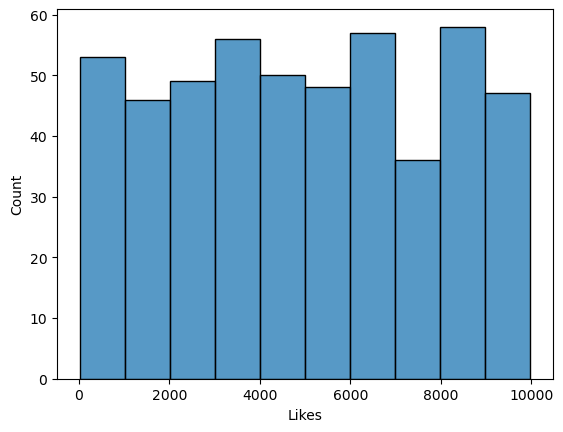

In [13]:
# Seaborn histogram plot of the Likes
sns.histplot(df['Likes'])
plt.show()

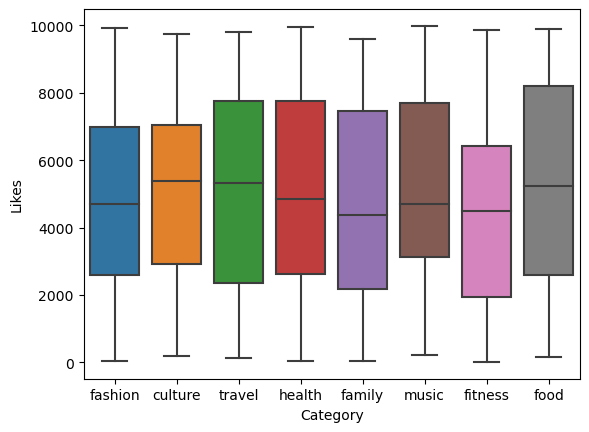

In [14]:
# Boxplot with the x axis as ‘Category’, and the y axis as ‘Likes’
sns.boxplot(data=df, x=df['Category'], y=df['Likes'])
plt.show()

In [15]:
df['Likes'].mean()

4961.804

In [16]:
df.groupby('Category')['Likes'].mean()

Category
culture    5157.584615
family     4760.641509
fashion    5062.577465
fitness    4436.467532
food       5239.946429
health     4994.585714
music      5138.156863
travel     5038.421053
Name: Likes, dtype: float64

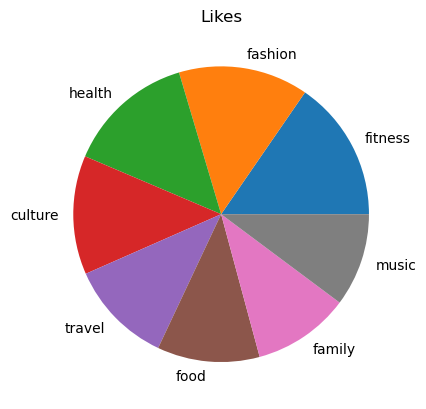

In [17]:
variable_counts = df['Category'].value_counts()
# print(variable_counts)
variable_values = variable_counts.index
plt.pie(variable_counts, labels = variable_values)
plt.title('Likes')
plt.show()